Importing Important packages

In [6]:
import psycopg2
import numpy as np
import ast
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

DataBase Connection

In [7]:

conn=psycopg2.connect(
    dbname="suchatbot", 
    user="postgres", 
    password=input(), 
    host="localhost", 
    port="5432"
)
cursor=conn.cursor()


Extracting questions and its embeddings from database

In [8]:
cursor.execute("CREATE EXTENSION IF NOT EXISTS vector;")
cursor.execute("select questionEmb,question from embeddings;")

Storing embedding and question in seprate lists

In [9]:
listEmbbedingsQue=[]
listQuestion=[]
result = cursor.fetchall()
if result:
    for i in result:
        listEmb=ast.literal_eval(i[0]) # i is a tuple
        listEmbbedingsQue.append(listEmb)
        listQuestion.append(i[1])

Converting list of embeddings to np.array for clustering

In [10]:
dataQue=np.array(listEmbbedingsQue)

# Calculating WCSS (Within-Cluster Sum of Squares) for different value of cluster centre for Questions

In [11]:

listClustersQue=[]
listWcssQue=[]
for i in range(2,100):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(dataQue)
    wcss=kmeans.inertia_
    listClustersQue.append(i)
    listWcssQue.append(wcss)


In [12]:
print(listWcssQue)

[180.84469602321266, 171.96916664867007, 166.66459019662943, 161.55823386698643, 156.31987543438368, 154.05330443759104, 153.36058640907476, 149.6065343597164, 147.03818877617118, 143.30363352198543, 138.77309352188564, 136.01471048444384, 134.1799573630572, 132.86851556725162, 129.5257893165935, 127.03614823337819, 125.3041094623899, 123.9969111780332, 123.59646624662565, 123.8086518647356, 122.94342944311839, 121.75869164585193, 120.6500658008224, 119.38767977906906, 117.2813074647014, 115.3435617930084, 114.35410525999296, 113.28423657415732, 111.64916171910761, 109.61710104597793, 108.39946051155047, 106.07288373765218, 105.12509288517802, 104.13373130208208, 102.47194008342278, 101.90693785610853, 100.51855244577956, 99.15817898553402, 97.71747830618878, 96.34999169559504, 94.401007791463, 94.57888915258843, 93.35005458798486, 92.28331949301813, 90.7930568260241, 89.67505560821364, 89.0063788720397, 88.09782973508867, 87.4231768587557, 86.66739555868708, 86.09638794565657, 84.9800

# Using plot to determine suitable number of cluster by using the changes in WCSS

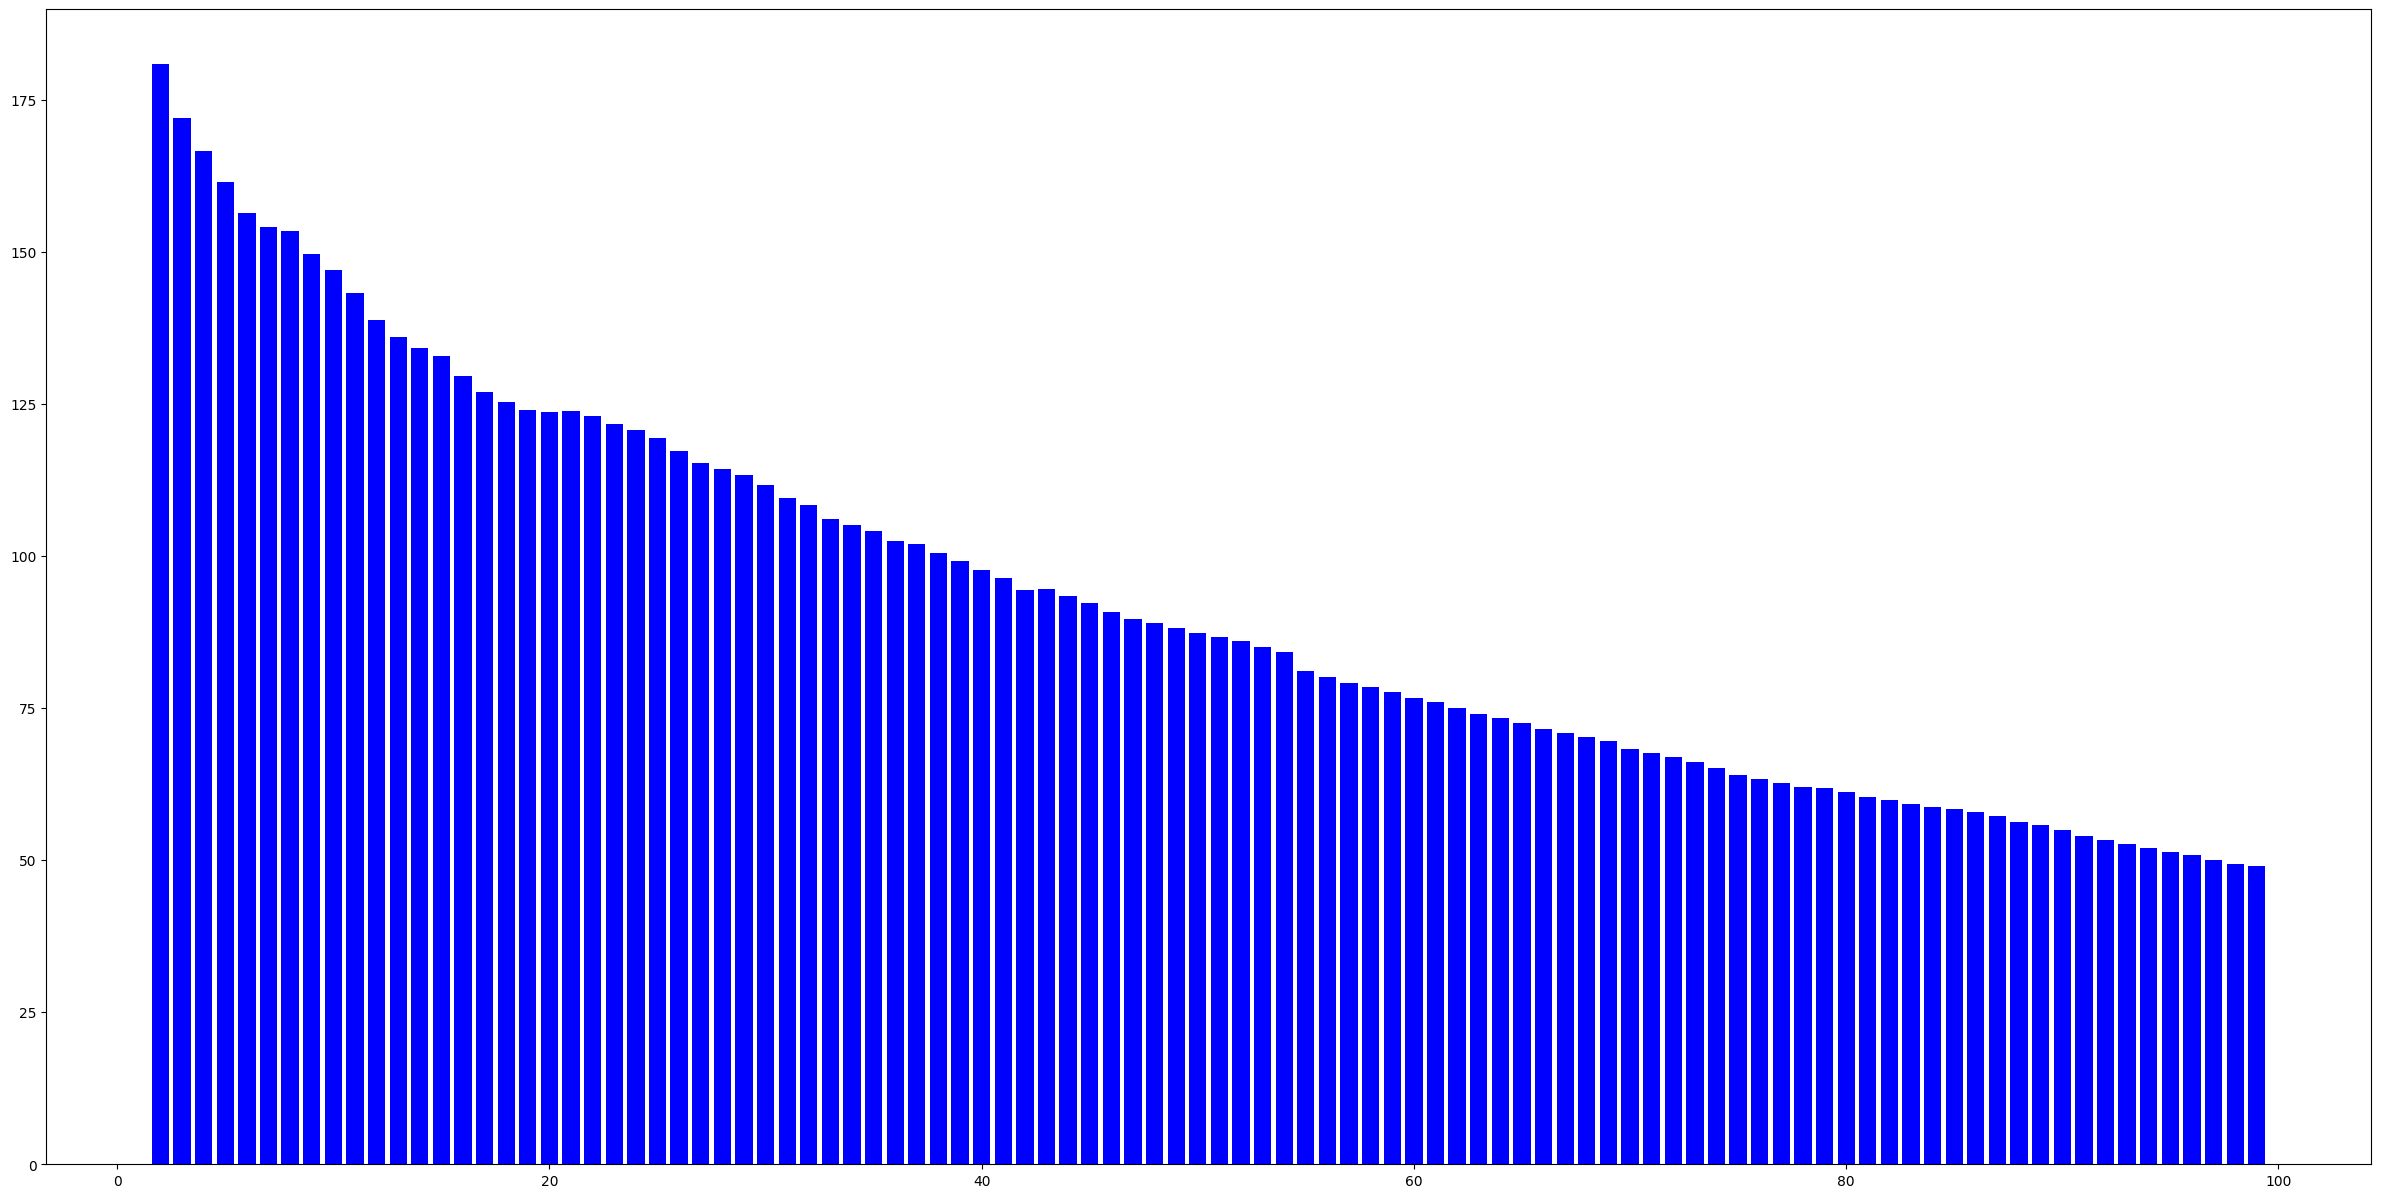

In [13]:
plt.figure(figsize=(30, 15), dpi=100)
plt.bar(listClustersQue,listWcssQue,color="blue")
plt.show()

23 seems to be suitable

# Ploting  the centroids using KMeans and matplotlib

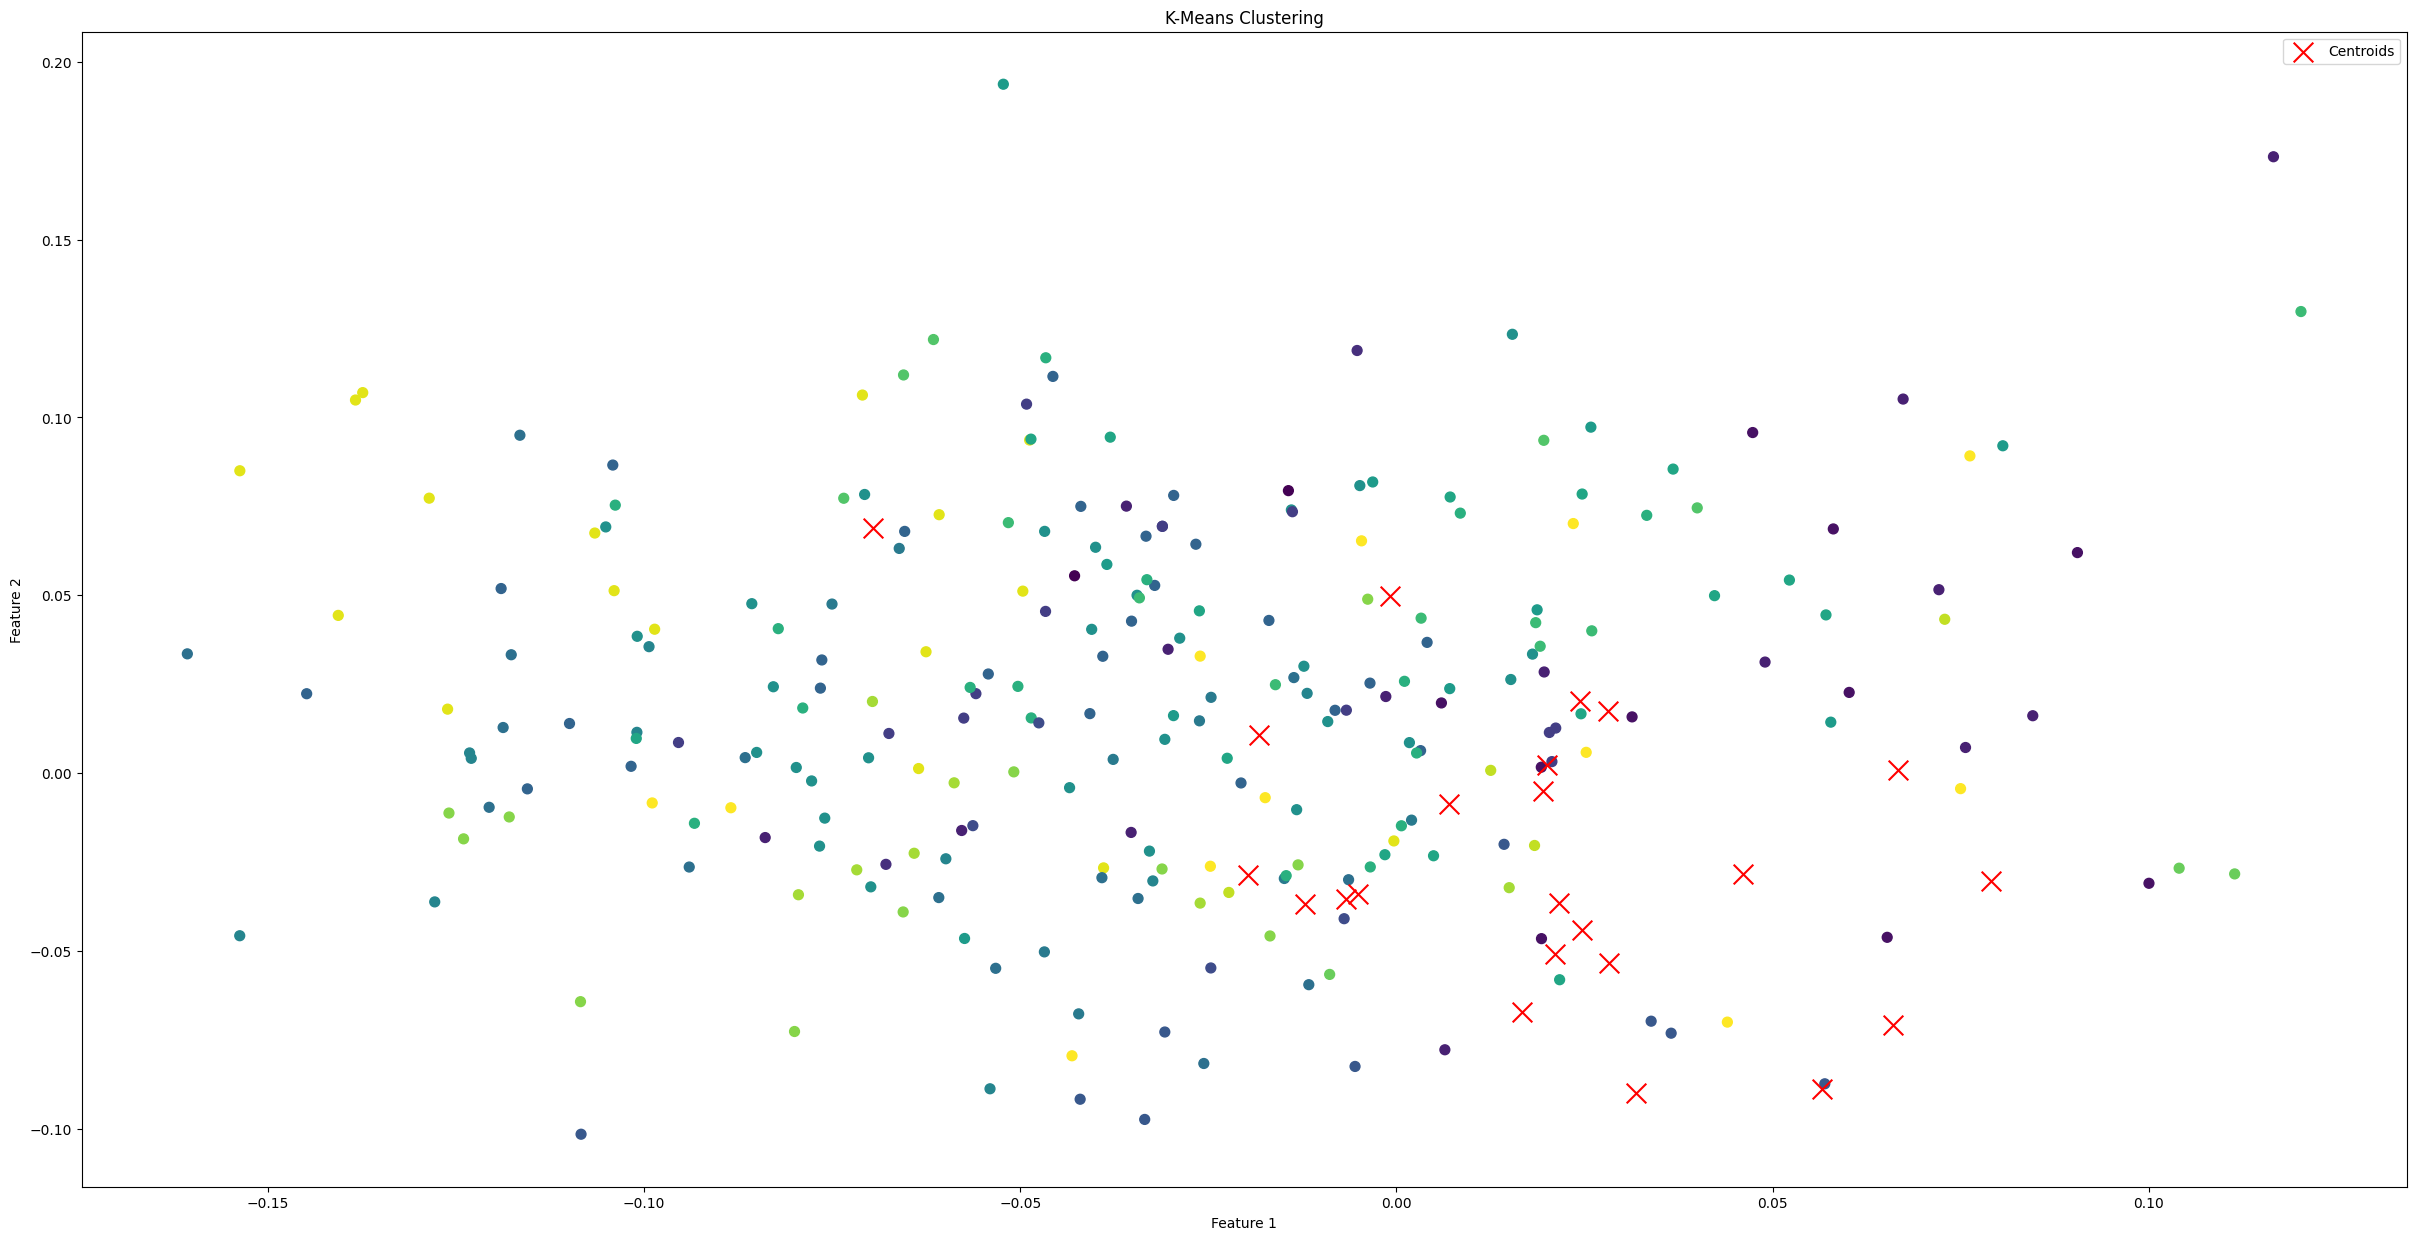

In [14]:
kmeans = KMeans(n_clusters=23, random_state=1) # using 23
kmeans.fit(dataQue)
centroids = kmeans.cluster_centers_
labelsQue = kmeans.labels_


plt.figure(figsize=(30, 15), dpi=100)
plt.scatter(dataQue[:, 1], dataQue[:, 10], c=labelsQue, cmap='viridis', marker='o', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
print(labelsQue)

[20 20 22 10 10 10  7 10 10 10 10 11  4 13 13 21 11 11 21 21 21  1 11  7
  1  6  9  1  9  9 12 13 22 18  5  9  2 22  8  4 22  9  9 22  8  8 12 15
  8 19 18 21 20 11 11 11 19 19 19 19  1  1  1 10  7  7 17 17 22  6  7 22
 14  7  7 13 10  4  7  7  1  3  6  6 19 22 13 11 11  7  7 21 21  7  4  4
  4 11  9  9  9 15 15 15  0  0  2 18 18 18 18 13 13 13 11 11  8  6  8 13
 13 11 11  1 11 11 11  7 11 11 11  2  2 16  5 13 12  2  4  4  4  7 18 15
 12 20 12 14 11  6 14 10 13 15 15 14 21 21 21 21 21 21 21 13 14 14 14 14
 11  3  7  1 22  4  4  8  8 18 14 14  2  2 16  7  1 11 14  2  6 22  2  2
 18  6 11  7  7  7 11 11 19  2  4 16 12  8 12  7  6 22  2 18  2  7 12 15
 16 21 13 21 21 18 14 14 14  5 14 14  5 11  2  7  7  7  8  8  8 16 12 22
 13  7 12  4 11 17 11  8  8  8]


Creating Dictionary to store labeling. keys as label, values as list of question

In [16]:
dictLabelQue={}
for i in range(23):
    dictLabelQue[i]=[]

In [17]:
for i in range(len(labelsQue)):
    dictLabelQue[labelsQue[i]].append(listQuestion[i])

# Labels Questions

In [18]:
dictLabelQue

{0: ['When was the first batch started?', 'How many batches are there?'],
 1: ['Who is the founder?',
  'Who is funding the university?',
  'What motivates the founder to invest his money in this university for the students?',
  'Who is the Vice Chancellor?',
  'Who is the Dean?',
  'Who is the Principal?',
  'Can we get scholarship?',
  'Who Is the Founder Of This University',
  'Who is Founder?',
  'what should we do to maintain our scholarship?'],
 2: ['Do you have any special classes for weak students?',
  'Will every student have placement?',
  'How does the university support students in developing leadership skills',
  'Is there any rule if the student fails to perform than money is charged',
  'What if a student falls sick?',
  'What average placement I can expect if i had a good academic report',
  'What will be the average placement in this university',
  'When we may ask doubts from the teacher after class?',
  'I am new in learning programming languages and I have joined Co

# Applying Same process for Answers

In [19]:
listEmbbedingsAnswer=[]
listAnswer=[]

In [20]:
cursor.execute("select answerEmb,answer from embeddings;")

In [21]:
result=cursor.fetchall()
if result:
    for i in result:
        val=ast.literal_eval(i[0])
        listEmbbedingsAnswer.append(val)
        listAnswer.append(i[1])

In [22]:
dataAns=np.array(listEmbbedingsAnswer)

In [23]:
listWcssAns=[]
listClusterAns=[]
for i in range(2,100):
    kmeans=KMeans(n_clusters=i,random_state=23)
    kmeans.fit(dataAns)
    wcss=kmeans.inertia_
    listClusterAns.append(i)
    listWcssAns.append(wcss)

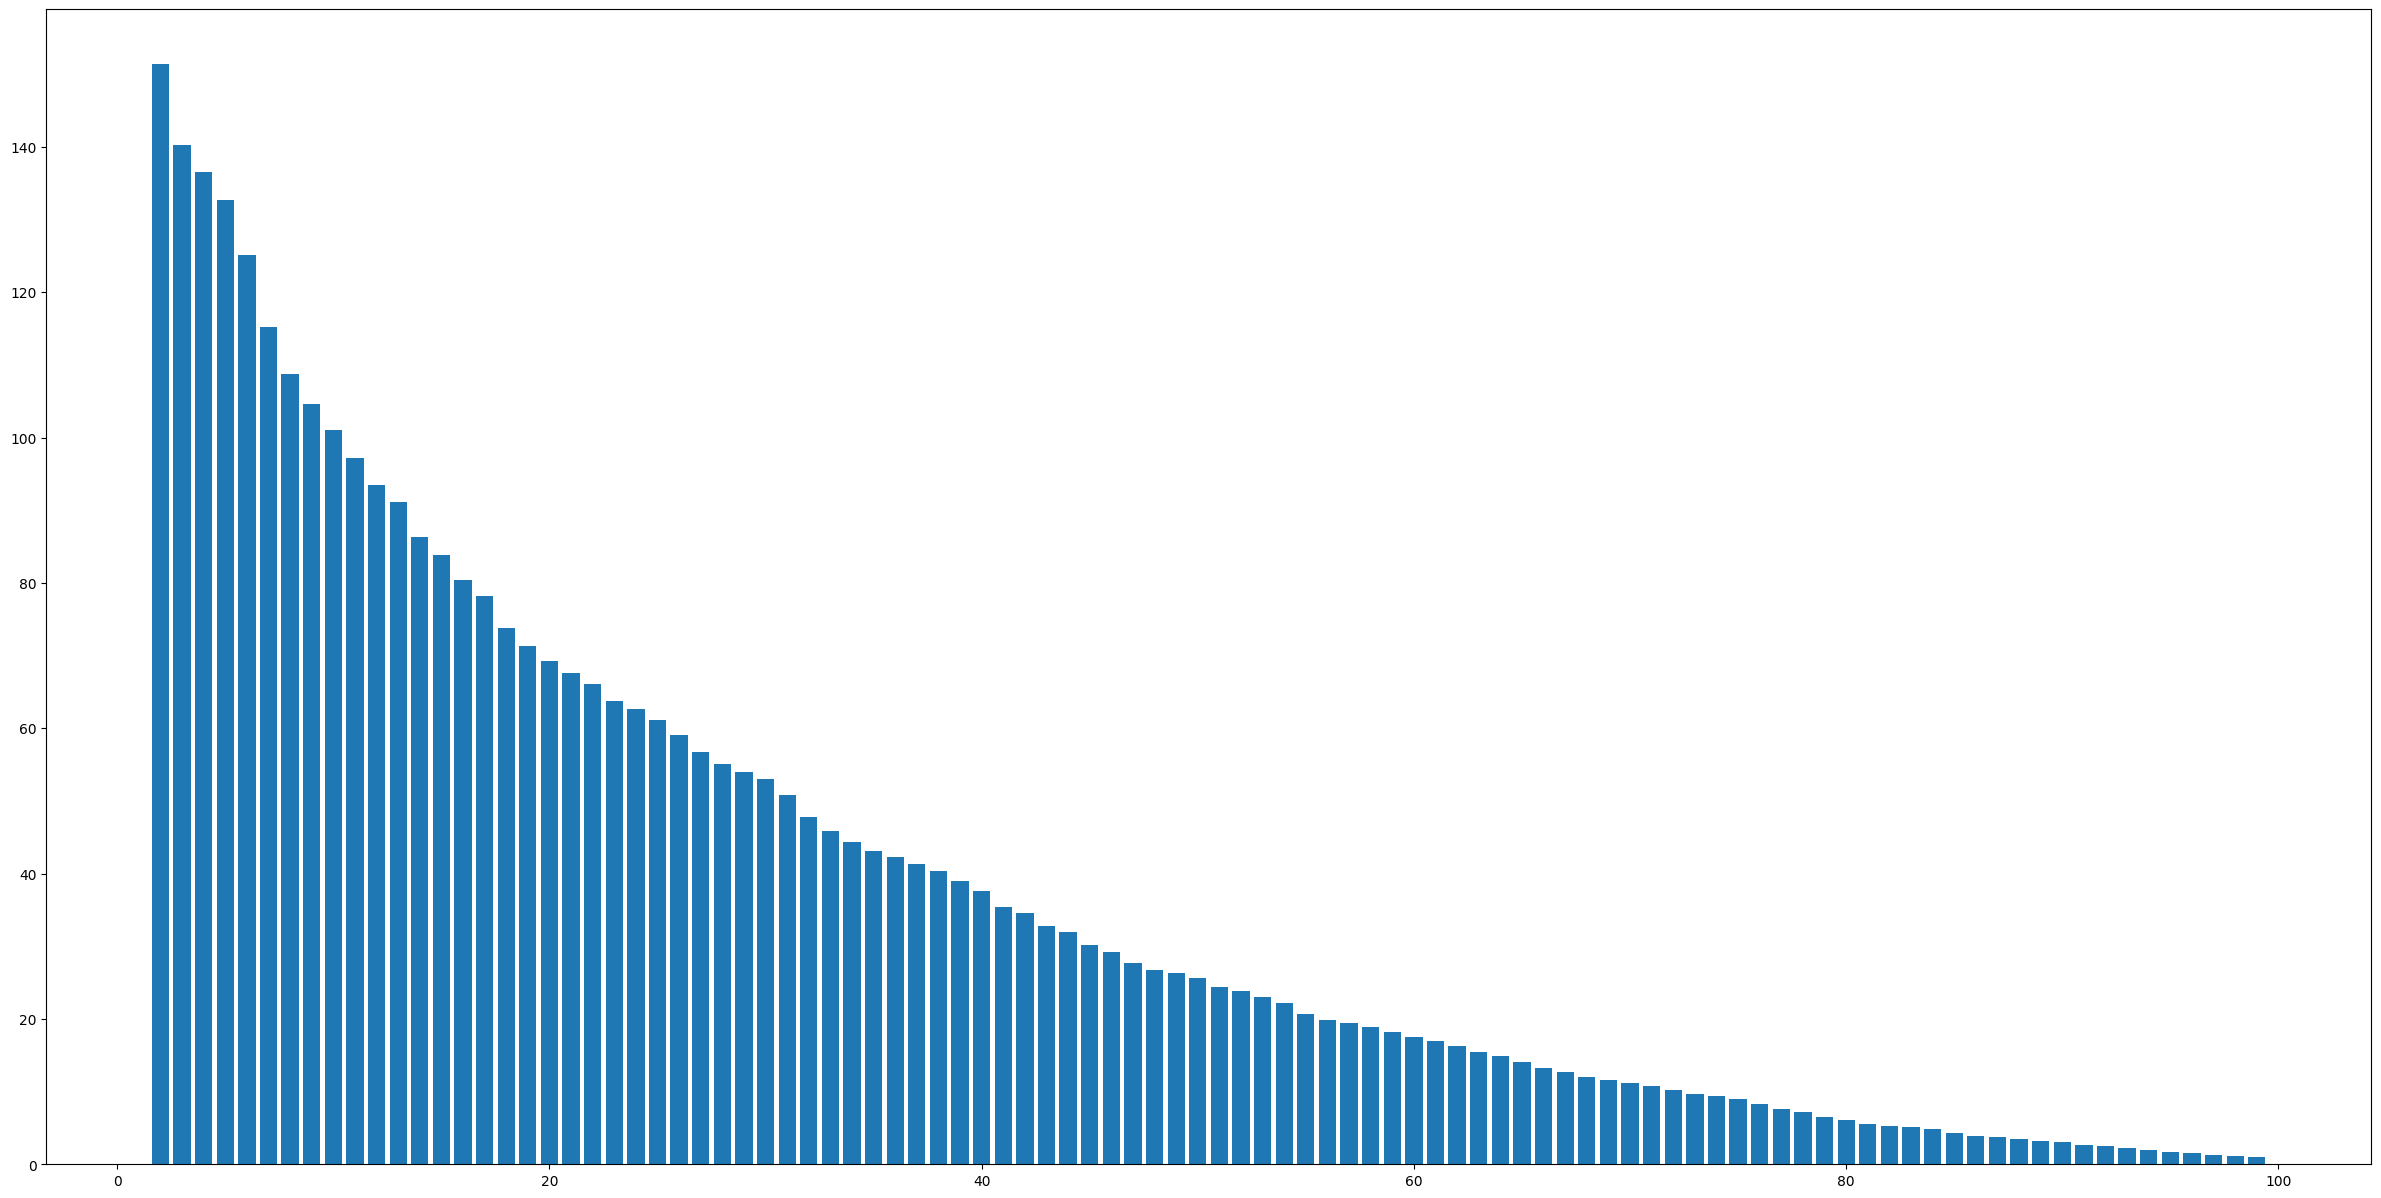

In [24]:
plt.figure(figsize=(30, 15), dpi=100)
plt.bar(listClusterAns,listWcssAns)
plt.show()

13 seems to suitable

In [25]:
dictLabelAns={}
for i in range(13):
    dictLabelAns[i]=[]

In [26]:
kmeans = KMeans(n_clusters=13, random_state=2) # using 13 as no of centroids
kmeans.fit(dataAns)
centroids = kmeans.cluster_centers_
labelsAns = kmeans.labels_

In [27]:
for i in range(len(labelsAns)):
    dictLabelAns[labelsAns[i]].append(listAnswer[i])

# Labeled Answers

In [28]:
dictLabelAns

{0: ['Our students get internships from the first year itself through our vast network of startups.',
  'Our students get internships from the first year itself through our vast network of startups.',
  'As of 2024, Our placements are yet to happen since our first batch is in its third year. But our students have been offered internships in their first year itself by startups like Glean, Inmobi, Mathesis Advisers, Trademo, Chalo, Beans.ai, Skyroot, Yulu, Zeni, Tracxn, Moglix, Proshort, ChaiPoint, FirstHive and many more.',
  'As of 2024, Our placements are yet to happen since our first batch is in its third year. But our students have been offered internships in their first year itself by startups like Glean, Inmobi, Mathesis Advisers, Trademo, Chalo, Beans.ai, Skyroot, Yulu, Zeni, Tracxn, Moglix, Proshort, ChaiPoint, FirstHive and many more.',
  'As of 2024, Our placements are yet to happen since our first batch is in its third year. But our students have been offered internships in t

In [29]:
conn.close()

# Creating DataFrames

In [30]:
dfQueLabel=pd.DataFrame({"Question":listQuestion,"Label":labelsQue})

In [31]:
dfQueLabel

,Question,Label
0,What is the fees?,20
1,What is the cost of education?,20
2,What is the curriculum?,22
3,How are the faculty?,10
4,How many faculty are there?,10
...,...,...
245,Is it better than nits and iiits,17
246,Why SU is best over private collages?,11
247,How many clubs are there?,8
248,Which clubs are there?,8


In [32]:
dfAnslabel=pd.DataFrame({"Answer":listAnswer,"Labels":labelsAns})

In [33]:
dfAnslabel

,Answer,Labels
0,Sitare University is committed to providing hi...,1
1,Sitare University is committed to providing hi...,1
2,The curriculum at Sitare University focuses on...,7
3,Sitare University has very high standards for ...,7
4,"As of 2024, we have more than 8 full time facu...",3
...,...,...
245,We strongly believe that Sitare University is ...,1
246,We strongly believe that Sitare University is ...,1
247,There are total 7 clubs as follows: Coding clu...,4
248,There are total 7 clubs as follows: Coding clu...,4


# Converting the labels to csvs

In [34]:
dfQueLabel.to_csv("QuestionsLabel.csv")

In [35]:
dfAnslabel.to_csv("AnswersLabel.csv")

# Some Outputs

In [40]:
dfQueLabel[dfQueLabel["Label"]==4]

,Question,Label
12,How many students are there?,4
39,How many students are you planning to admit?,4
77,How many students are currently studying?,4
94,How many girls studying?,4
95,How many boys studying?,4
96,What is the gender ratio?,4
138,how many are in 1st year?,4
139,how many are in 2nd year?,4
140,how many are in 3rd year?,4
173,How many students are there?,4


In [37]:
dfAnslabel[dfAnslabel["Labels"]==7]

,Answer,Labels
2,The curriculum at Sitare University focuses on...,7
3,Sitare University has very high standards for ...,7
10,Sitare University has very high standards for ...,7
11,The best way to deal with any job scarcity sit...,7
16,The best way to deal with any job scarcity sit...,7
17,The best way to deal with any job scarcity sit...,7
22,The best way to deal with any job scarcity sit...,7
53,Sitare University has an industry focussed cur...,7
54,Sitare University has an industry focussed cur...,7
55,Sitare University has an industry focussed cur...,7


In [38]:
dfQueLabel[dfQueLabel["Label"]==6]

,Question,Label
25,Do you have other branches apart from computer...,6
69,What is the perspective about computer science?,6
82,What areas in computer Science are focused at?,6
83,Which areas in computer Science are focused at?,6
117,How can I excel in computer science? I don't h...,6
149,"In this modern world, this fast growing techno...",6
188,Is Sitare focus on other things than computer ...,6
193,What if someone wants to go for master in comp...,6
208,Why only Computer Science only??,6


# Using Naive Baise

In [39]:
dfQue=pd.read_csv("QuestionsLabel.csv")